## import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


## Explore the data set

In [2]:
file_path = "loan.csv"
df = pd.read_csv(file_path)
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## checkout for null_values/duplicates

In [3]:
df.isna().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

## Data Visualization

In [6]:
df2= df['loan_status'].value_counts().reset_index()
df2



,loan_status,count
0,Approved,45
1,Denied,16


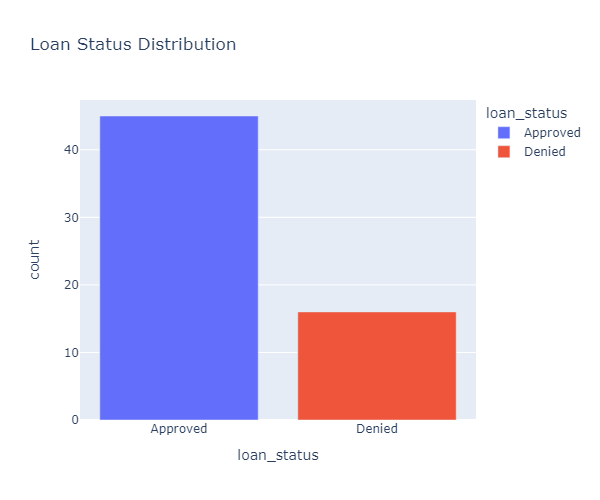

In [7]:
fig = px.bar(df2, x='loan_status', y='count', title='Loan Status Distribution', width=600, color='loan_status')
fig.show(renderer='png')

In [8]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


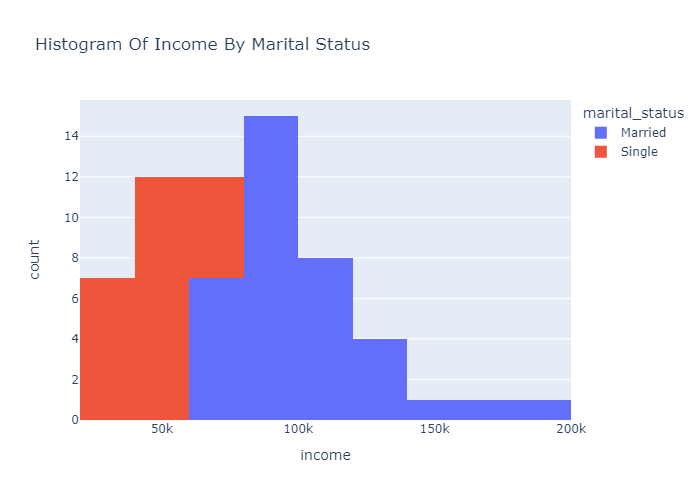

In [9]:
fig = px.histogram(df, x='income', nbins=15, color='marital_status', title='Histogram Of Income By Marital Status')
fig.show(renderer='png')

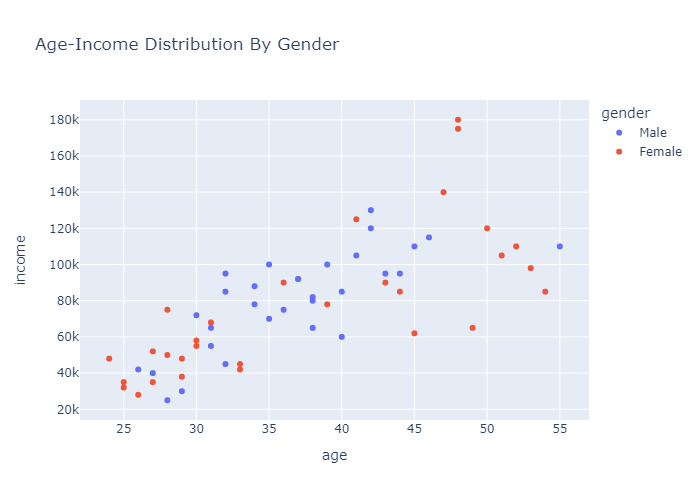

In [10]:
fig = px.scatter(df, x='age', y='income', color='gender', title='Age-Income Distribution By Gender')
fig.show(renderer='png')


In [11]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

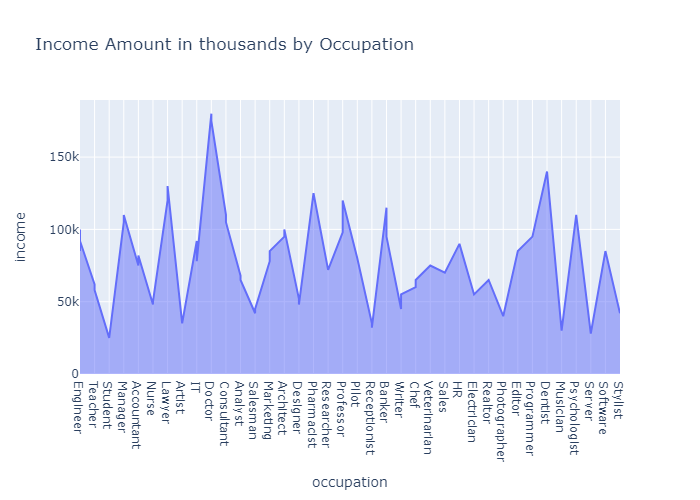

In [12]:
fig = px.area(df, x='occupation', y='income', title='Income Amount in thousands by Occupation')
fig.show(renderer='png')

In [13]:
df2 = df['education_level'].value_counts().reset_index()
df2

,education_level,count
0,Bachelor's,23
1,Master's,15
2,Doctoral,10
3,High School,7
4,Associate's,6


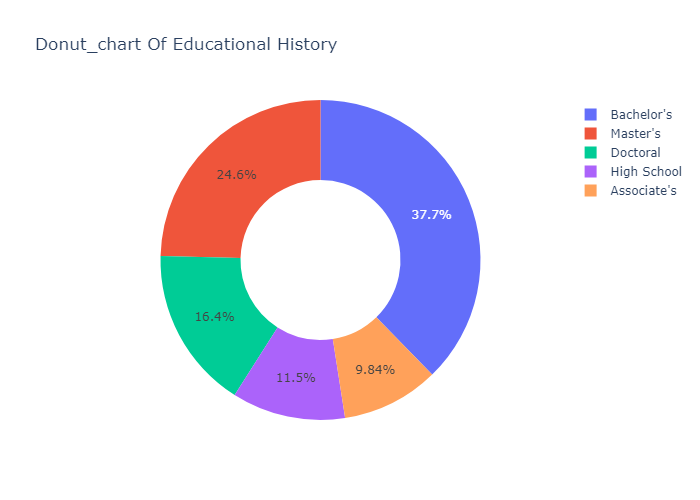

In [14]:
fig = px.pie(df2, names='education_level', values='count', title='Donut_chart Of Educational History', hole=0.5)
fig.show(renderer='png')

In [15]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [16]:
df2 = df.groupby(['gender', 'marital_status'])['income'].mean().reset_index()
df2

,gender,marital_status,income
0,Female,Married,110428.571429
1,Female,Single,48187.500000
2,Male,Married,92478.260870
3,Male,Single,46750.000000


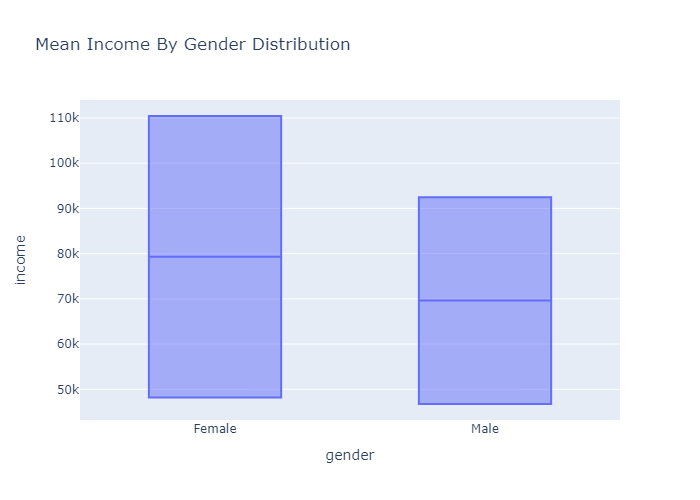

In [17]:
fig = px.box(df2, x='gender', y='income', title='Mean Income By Gender Distribution')
fig.show(renderer='png')

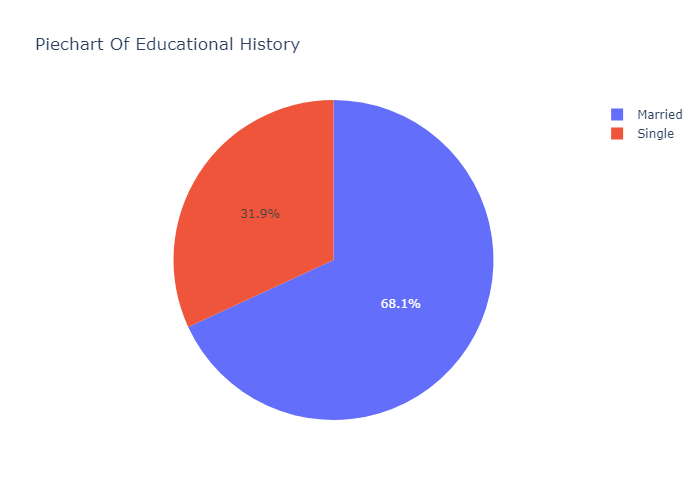

In [18]:
fig = px.pie(df2, names='marital_status', values='income', title='Piechart Of Educational History')
fig.show(renderer='png')

In [19]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

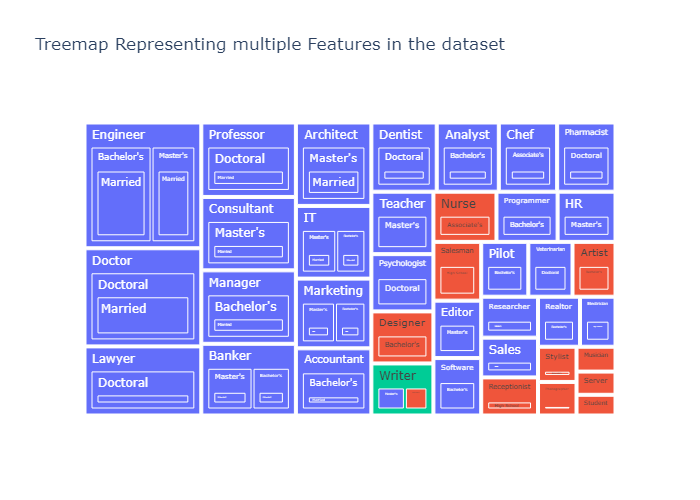

In [20]:
fig = px.treemap(df, path=['occupation', 'education_level', 'marital_status'], values='income', color='loan_status', hover_data=['age'], title='Treemap Representing multiple Features in the dataset')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"


## Drop unnecessary columns

In [25]:
df.drop(['gender', 'education_level'], axis=1, inplace=True)

## convert categorical features to numeric 

In [26]:
df.head()

,age,occupation,marital_status,income,credit_score,loan_status
0,32,Engineer,Married,85000,720,Approved
1,45,Teacher,Single,62000,680,Approved
2,28,Student,Single,25000,590,Denied
3,51,Manager,Married,105000,780,Approved
4,36,Accountant,Married,75000,710,Approved


In [27]:
categorical_df = df.select_dtypes('object')
categorical_df.head()

,occupation,marital_status,loan_status
0,Engineer,Married,Approved
1,Teacher,Single,Approved
2,Student,Single,Denied
3,Manager,Married,Approved
4,Accountant,Married,Approved


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df.columns:
    if i in categorical_df.columns:
        df[i] = encoder.fit_transform(df[i])

In [29]:
df.head()

,age,occupation,marital_status,income,credit_score,loan_status
0,32,12,0,85000,720,0
1,45,35,1,62000,680,0
2,28,33,1,25000,590,1
3,51,16,0,105000,780,0
4,36,0,0,75000,710,0


## Split the data into training/testing set/Labels 

In [30]:
train_set = df.sample(frac=0.8, random_state=0)
test_set = df.drop(train_set.index)

In [31]:
train_features = train_set.copy()
test_features = test_set.copy()

In [32]:
train_labels = train_features.pop('loan_status')
test_labels = test_features.pop('loan_status')

## Feature Scaling

In [33]:
normalized = preprocessing.Normalization()
normalized.adapt(np.array(train_features))

## model the data with Sequential Model

In [42]:
model = keras.models.Sequential([
    normalized,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

## print the model summary

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,100
Trainable params: 9,089
Non-trainable params: 11
_________________________________________________________________


## Compile the model

In [48]:
loss = keras.losses.BinaryCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.01)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

## Train the model

In [49]:
model.fit(train_features, train_labels,
          batch_size=64,
          epochs=200,
          verbose=1,
          validation_split=0.2)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.6845e-08 - accuracy: 1.0000 - val_loss: 1.9081 - val_accuracy: 0.9000
Epoch 2/200
1/1 [==============================] - 0s 61ms/step - loss: 2.5440e-08 - accuracy: 1.0000 - val_loss: 1.9115 - val_accuracy: 0.9000
Epoch 3/200
1/1 [==============================] - 0s 113ms/step - loss: 2.3679e-08 - accuracy: 1.0000 - val_loss: 1.9154 - val_accuracy: 0.9000
Epoch 4/200
1/1 [==============================] - 0s 78ms/step - loss: 2.1823e-08 - accuracy: 1.0000 - val_loss: 1.9197 - val_accuracy: 0.9000
Epoch 5/200
1/1 [==============================] - 0s 63ms/step - loss: 2.0082e-08 - accuracy: 1.0000 - val_loss: 1.9241 - val_accuracy: 0.9000
Epoch 6/200
1/1 [==============================] - 0s 62ms/step - loss: 1.8625e-08 - accuracy: 1.0000 - val_loss: 1.9287 - val_accuracy: 0.9000
Epoch 7/200
1/1 [==============================] - 0s 58ms/step - loss: 1.7366e-08 - accuracy: 1.0000 - val_loss: 1.9333 - val_accuracy: 

## Evaluate the model performance

In [50]:
model.evaluate(test_features, test_labels, verbose=1)

1/1 [==============================] - 0s 32ms/step - loss: 0.0728 - accuracy: 0.9167


[0.07280683517456055, 0.9166666865348816]

## Save/Load the traind model

In [39]:
model.save('loan.json')

INFO:tensorflow:Assets written to: loan.json\assets


In [40]:
model = keras.models.load_model('loan.json')

## Predict using the saved model

In [41]:
prediction = model.predict(np.array([[28,33,1,25000,590]]))

threshold = 0.5
for pred in prediction:
    if prediction>= threshold:
        print('Loan Approved')
    else:
        print('Loan Denied')    

1/1 [==============================] - 0s 279ms/step
Loan Approved
